In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

def invert_color(img):
    iimg = cv2.split(img);
    iimg = cv2.merge((iimg[2],iimg[1],iimg[0]))
    return iimg

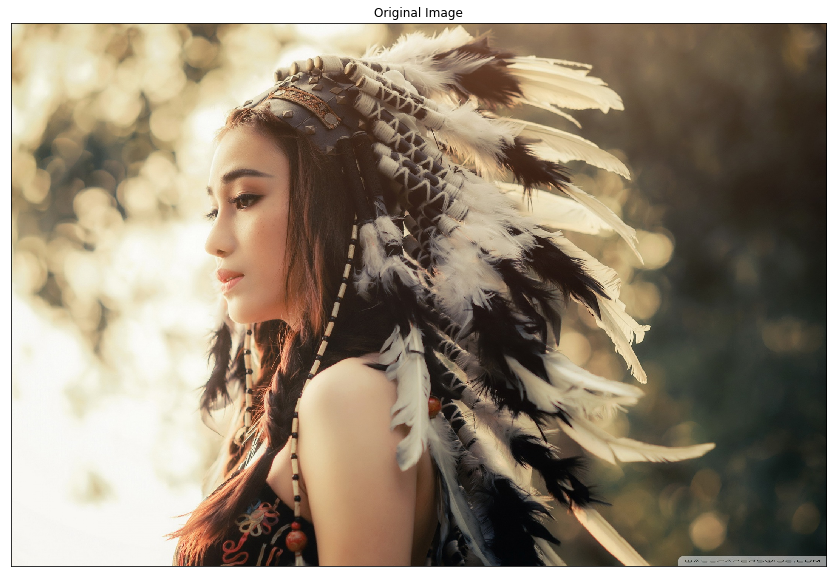

In [2]:
img = cv2.imread('img.jpg')
#img = cv2.imread('C:\Users\Mauro\Desktop\opencv\sources\samples\data\lena.jpg')
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
plt.title("Original Image")
plt.imshow(invert_color(img))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [3]:
img.shape

(1440L, 2160L, 3L)

In [4]:
def getPattern(offset_r,offset_c,img):
    
    H = img.shape[0]
    W = img.shape[1]
    
    P = np.zeros((W,H))
    
    pr = [float((x+offset_r)%2) for x in range(2)]
    pr = np.tile(pr,(W/2))
    
    P = [pr*(i+offset_c)%2 for i in range(H)]
    return np.array(P)
    
%time r_pattern = getPattern(1,1,img)
%time b_pattern = getPattern(0,0,img)
%time g_pattern = getPattern(0,1,img)+getPattern(1,0,img)

#print(r_pattern)
#print(b_pattern)
#print(g_pattern)

def PSNR(img1,img2, border):
    img1 = img1.astype(np.float)
    img2 = img2.astype(np.float)
    MSE = 0.0
    for i in range(len(img1)-border)[border:]:
        for j in range(len(img1)-border)[border:]:
            MSE = MSE + np.linalg.norm(img1[i][j]-img2[i][j])       
    MSE = MSE/((len(img1)-6)*(len(img1)-6))
    PSNR = 20*np.log10(255/np.sqrt(MSE))
    return PSNR

def PSNRv(img1,img2,border):
    
    b1,g1,r1 = cv2.split(img1)
    b2,g2,r2 = cv2.split(img2)    
    
    print("Red Channel: ",PSNR(r1,r2,border),"dB")
    print("Green Channel: ",PSNR(g1,g2,border),"dB")
    print("Blue Channel: ",PSNR(b1,b2,border),"dB")
    print("Image: ",PSNR(img1,img2,border),"dB")
    return

Wall time: 195 ms
Wall time: 177 ms
Wall time: 398 ms


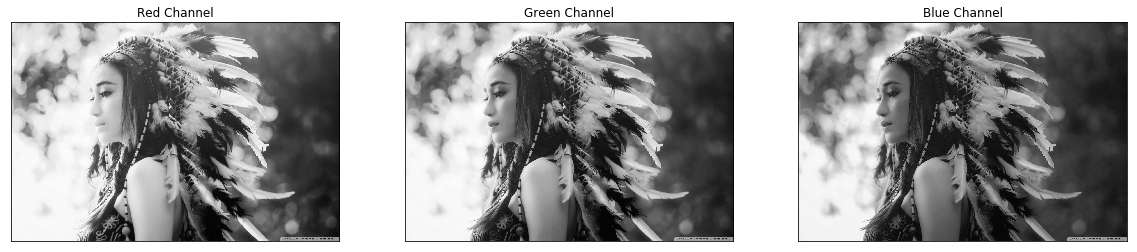

In [5]:
b,g,r = cv2.split(img)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
#plt.imshow(r, cmap="Reds")
plt.imshow(r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel")
#plt.imshow(g, cmap="Greens")
plt.imshow(g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel")
#plt.imshow(b, cmap="Blues")
plt.imshow(b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Wall time: 16 ms
Wall time: 16 ms
Wall time: 28 ms


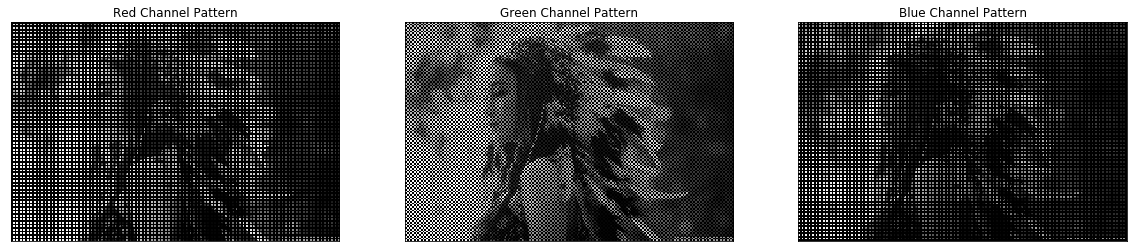

In [6]:
%time bp_r = r_pattern*r
%time bp_g = g_pattern*g
%time bp_b = b_pattern*b

#print(bp_r)
#print(bp_b)
#print(bp_g)


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel Pattern")
plt.imshow(bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel Pattern")
plt.imshow( bp_g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel Pattern")
plt.imshow(bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [9]:
def fill_cross(matrix,shift_r,shift_c):
    
    matrixb = np.copy(matrix)
    
    irange = range(shift_r,matrix.shape[0]-1,2)
    jrange = range(shift_c,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i,j] = (matrix[i+1,j+1] + matrix[i+1,j-1] + matrix[i-1,j+1] + matrix[i-1,j-1])/4
    return matrixb

Wall time: 1.05 s
Wall time: 1.06 s
Wall time: 0 ns


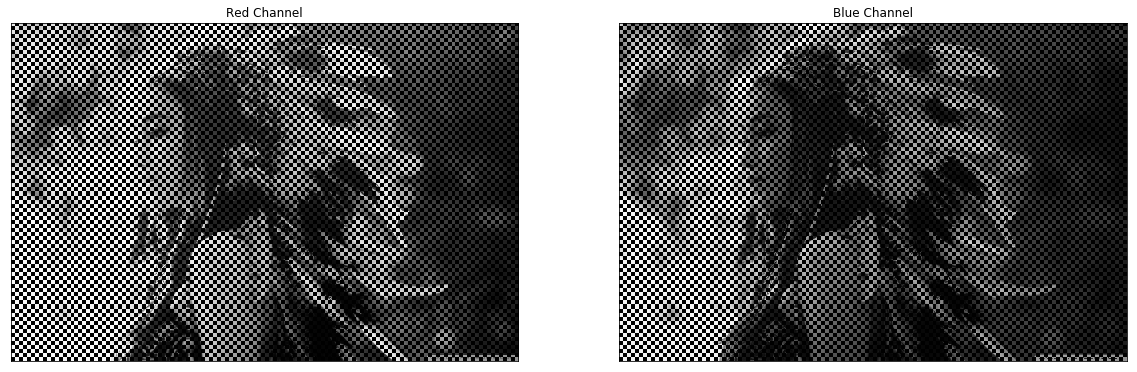

In [10]:
%time fc_bp_r = fill_cross(bp_r,1,1)
%time fc_bp_b = fill_cross(bp_b,2,2)
%time fc_bp_g = bp_g

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Red Channel")
plt.imshow(fc_bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.title("Blue Channel")
plt.imshow(fc_bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()


In [11]:
def fill_diag(matrix,shift_rp,shift_rd,shift_c_rp,shift_c_rd):
    
    matrixb = np.copy(matrix)
    
    irange = range(shift_rp,matrix.shape[0]-1,2)
    jrange = range(shift_c_rp,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i][j] = (matrix[i+1][j]+ matrix[i-1][j]+ matrix[i][j+1]+ matrix[i][j-1])/4
            
    irange = range(shift_rd,matrix.shape[0]-1,2)
    jrange = range(shift_c_rd,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i][j] = (matrix[i+1][j]+ matrix[i-1][j]+ matrix[i][j+1]+ matrix[i][j-1])/4
            
    return matrixb

Wall time: 2.68 s
Wall time: 2.66 s
Wall time: 2.69 s


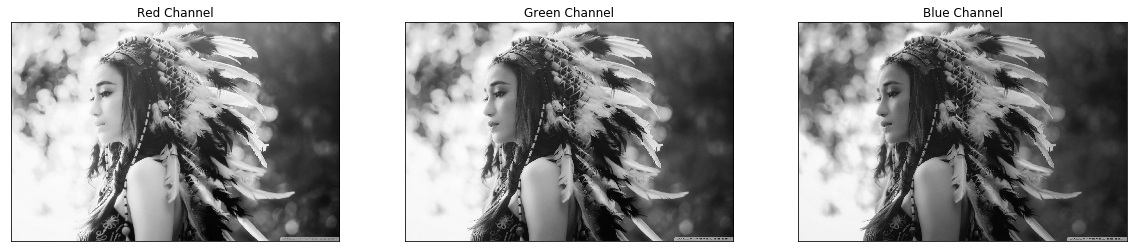

In [12]:
%time fd_bp_r = fill_diag(fc_bp_r,1,2,2,1)
%time fd_bp_b = fill_diag(fc_bp_b,2,3,3,2)
%time fd_bp_g = fill_diag(fc_bp_g,1,2,1,2)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
#plt.imshow(r, cmap="Reds")
plt.imshow(fd_bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel")
#plt.imshow(g, cmap="Greens")
plt.imshow(fd_bp_g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel")
#plt.imshow(b, cmap="Blues")
plt.imshow(fd_bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

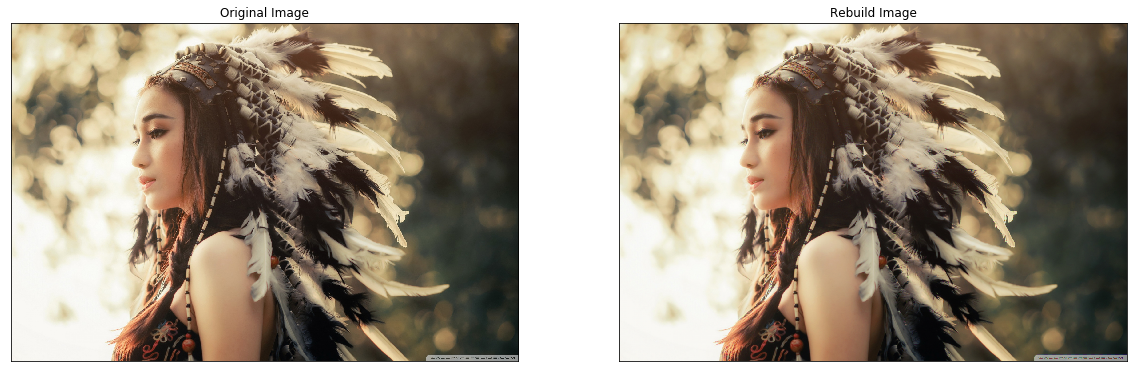

In [13]:
Ricostruzione = cv2.merge((fd_bp_b,fd_bp_g,fd_bp_r))
Ricostruzione = Ricostruzione.astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(invert_color(img))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(invert_color(Ricostruzione))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [14]:
PSNRv(img,Ricostruzione,5)

('Red Channel: ', 46.559290412636727, 'dB')
('Green Channel: ', 49.73908975861395, 'dB')
('Blue Channel: ', 46.510679167742531, 'dB')
('Image: ', 43.779699494845929, 'dB')


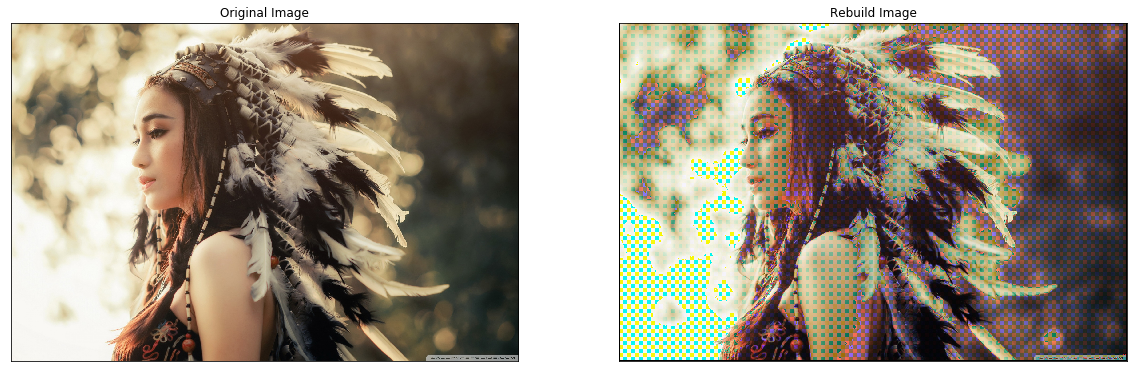

In [15]:
Seconda = np.zeros((img.shape[0],img.shape[1],img.shape[2]))

irange = range(img.shape[0]-3)[3:]
jrange = range(img.shape[1]-3)[3:]

#alpha = (1.0/2)
#beta = (5.0/8)
#gamma = (3.0/4)

alpha = 1
beta = 1
gamma = 1


for i in irange:
    for j in jrange:
        if (i+1)%2 is 0:
            if (j+1)%2 is 0:
                #BLUE@BLUE
                Seconda[i][j][0] = bp_b[i][j]
                #GREEN@BLUE
                Seconda[i][j][1] = (1.0/8)*(4*bp_b[i][j]-bp_b[i+2][j]-bp_b[i-2][j]-bp_b[i][j+2]-bp_b[i][j-2])
                Seconda[i][j][1] += (1.0/8)*(2.0)*(bp_g[i+1][j]+bp_g[i-1][j]+bp_g[i][j+1]+bp_g[i][j-1])
                #RED@BLUE
                Seconda[i][j][2] = (1.0/8)*(6*bp_b[i][j]-(3.0/2)*(bp_b[i+2][j]-bp_b[i-2][j]-bp_b[i][j+2]-bp_b[i][j-2]))
                Seconda[i][j][2] += (1.0/8)*(2.0)*(bp_r[i+1][j+1]+bp_r[i-1][j-1]+bp_r[i-1][j+1]+bp_r[i+1][j-1])
                
            if (j+1)%2 is 1: 
                #GREEN@GREEN
                Seconda[i][j][1] = bp_g[i][j]
                #BLUE@GREEN@BLUEROW
                Seconda[i][j][0] = (1.0/8)*(5*bp_g[i][j]-bp_g[i+1][j+1]-bp_g[i+1][j-1]-bp_g[i-1][j-1]-bp_g[i-1][j+1])
                Seconda[i][j][0] += (1.0/8)*(-bp_g[i][j+2]-bp_g[i][j-2]+(1.0/2)*(bp_g[i-2][j]+bp_g[i+2][j]))
                Seconda[i][j][0] += (1.0/8)*(4.0)*(bp_b[i][j+1]+bp_b[i][j-1])
                #RED@GREEN@BLUEROW
                Seconda[i][j][2] = (1.0/8)*(5*bp_g[i][j]-bp_g[i+1][j+1]-bp_g[i+1][j-1]-bp_g[i-1][j-1]-bp_g[i-1][j+1])
                Seconda[i][j][2] += (1.0/8)*(-bp_g[i+2][j]-bp_g[i-2][j]+(1.0/2)*(bp_g[i][j+2]+bp_g[i][j-2]))
                Seconda[i][j][2] += (1.0/8)*(4.0)*(bp_r[i+1][j]+bp_r[i-1][j])
                
        if (i+1)%2 is 1:
            if (j+1)%2 is 0: 
                #GREEN@GREEN
                Seconda[i][j][1] = bp_g[i][j]
                #BLUE@GREEN@REDROW
                Seconda[i][j][0] = (1.0/8)*(5*bp_g[i][j]-bp_g[i+1][j+1]-bp_g[i+1][j-1]-bp_g[i-1][j-1]-bp_g[i-1][j+1])
                Seconda[i][j][0] += (1.0/8)*(-bp_g[i+2][j]-bp_g[i-2][j]+(1.0/2)*(bp_g[i][j-2]+bp_g[i][j+2]))
                Seconda[i][j][0] += (1.0/8)*(4.0)*(bp_b[i+1][j]+bp_b[i-1][j])
                #RED@GREEN@REDROW
                Seconda[i][j][2] = (1.0/8)*(5*bp_g[i][j]-bp_g[i+1][j+1]-bp_g[i+1][j-1]-bp_g[i-1][j-1]-bp_g[i-1][j+1])
                Seconda[i][j][2] += (1.0/8)*(-bp_g[i][j+2]-bp_g[i][j-2]+(1.0/2)*(bp_g[i-2][j]+bp_g[i+2][j]))
                Seconda[i][j][2] += (1.0/8)*(4.0)*(bp_r[i][j+1]+bp_r[i][j-1])

                
            if (j+1)%2 is 1: 
                #RED@RED
                Seconda[i][j][2] = bp_r[i][j]
                #GREEN@RED
                Seconda[i][j][1] = (1.0/8)*(4*bp_r[i][j]-bp_r[i+2][j]-bp_r[i-2][j]-bp_r[i][j+2]-bp_r[i][j-2])
                Seconda[i][j][1] += (1.0/8)*(2.0)*(bp_g[i+1][j]+bp_g[i-1][j]+bp_g[i][j+1]+bp_g[i][j-1])
                #BLUE@RED
                Seconda[i][j][0] = (1.0/8)*(6*bp_r[i][j]-(3.0/2)*(bp_r[i+2][j]-bp_r[i-2][j]-bp_r[i][j+2]-bp_r[i][j-2]))
                Seconda[i][j][0] += (1.0/8)*(2.0)*(bp_b[i+1][j+1]+bp_b[i-1][j-1]+bp_b[i-1][j+1]+bp_b[i+1][j-1])


Seconda = Seconda.astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(invert_color(img))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(invert_color(Seconda))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
PSNRv(img,Seconda,5)